### Redes neurais: üåÄ

O contexto hist√≥rico das redes neurais data do anos 1940, de modo que um psicologo junto de um l√≥gico matem√°tico - esqueci os respcetivos nomes dos pesquisadores - objetivavam criar um neur√¥nio artificial com base no org√¢nico. Com base nisso, tal neur√¥nio, semelhante ao seu hom√≥logo, possuia entradas, um n√∫cleo, no qual havia o processamento por meio de duas fun√ß√µes, e sa√≠das, semelhante segmento dendritos, n√∫cleo e ax√¥nio.

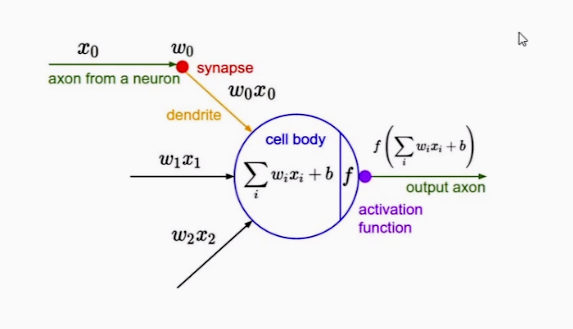

###Tensor:

Tensor √© o nome dado na matem√°tica para matrizes que possuem acima de duas dimens√µes, por√©m na computa√ß√£o √© comum se refetir como tensor qualquer tipo de matriz, inclusive aquelas que n√£o possuem sequer uma dimens√£o.

In [ ]:
import torch

# Criando tensores:

lista = [[1,2,4],
         [5,6,8]]

# Importante verificar que o tensor, ao converter a lista,
# transforma o tipo dos dados, de modo que antes estava em inteiro
# e agora est√° em float.

tns = torch.Tensor(lista)
print(tns)
print(tns.dtype)

print("")

# Mas h√° como alterar isso, bastando especificar, como :

tns_long = torch.LongTensor(lista)
print(tns_long)
print(tns_long.dtype)

print("")

# Ainda h√° uma forma de, a depender dos casos, aumentar a
# precis√£o da matriz criada por meio do double:

tns_double = torch.DoubleTensor(lista)
print(tns_double)

# Note que o tipo de dados mostrados ilustram o tensor gerado. Ainda que
# em rela√ß√£o √† primeira e a √∫ltima os dados se mostram em sua condi√ß√£o float,
# a precis√£o de cada qual √© diferente, demonstrado por meio do tipo dos dados.

tensor([[1., 2., 4.],
        [5., 6., 8.]])
torch.float32

tensor([[1, 2, 4],
        [5, 6, 8]])
torch.int64

tensor([[1., 2., 4.],
        [5., 6., 8.]], dtype=torch.float64)


In [ ]:
import numpy as np

# Convertendo um array numpy:

array = np.random.rand(3,4).astype(int)

tns_numpy = torch.from_numpy(array)
print(tns_numpy)
print(tns_numpy.dtype)

# Vale verificar que no caso do numpy, os tensores criados n√£o
# s√£o transformados, mantendo-os em sua condi√ß√£o original.

tensor([[0, 0, 0, 0],
        [0, 0, 0, 0],
        [0, 0, 0, 0]])
torch.int64


In [ ]:
# Criando tensores por meio do pr√≥prio tensor:

tns = torch.ones(3,3)
tns

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

###Classificador Linear:

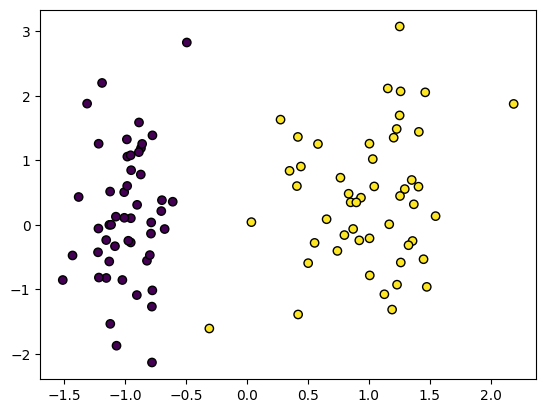

In [ ]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

np.random.seed(22)

X, Y = make_classification(n_features = 2, n_redundant= 0, n_informative = 1,
                           n_clusters_per_class= 1)

plt.scatter(X[ : , 0], X[ : , 1], marker = "o", c = Y,
            edgecolor = "k")

p = X[10]


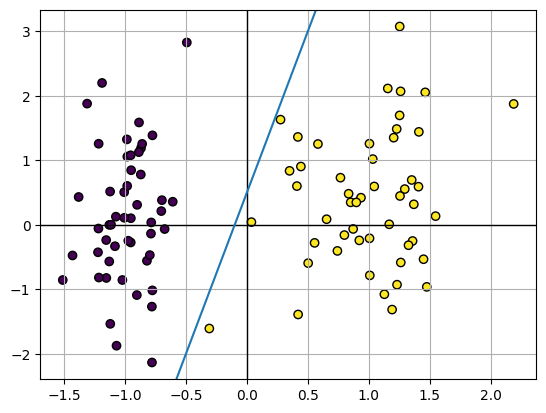

In [ ]:
# Criando um modelo de classifica√ß√£o por meio da reta:

def plotmodel(w1, w2, b):

  np.random.seed(22)

  plt.scatter(X[ : , 0], X[ : , 1], marker = "o", c = Y,
            edgecolor = "k")

  # Definindo x e y m√°ximos para que o gr√°fico n√£o mude a sua forma.

  xmin, xmax = plt.gca().get_xlim()
  ymin, ymax = plt.gca().get_ylim()

  x = np.linspace(-2, 4, 50)
  y = (-w1*x - b) / w2


  plt.axvline(0, -1, 1, color = "k", linewidth = 1)
  plt.axhline(0, -2, 4, color = "k", linewidth = 1)
  plt.plot(x, y)
  plt.grid(True)

  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)

w1 = -5
w2 =  1
b =  -0.5

plotmodel(w1, w2, b)


In [ ]:
# Criando uma fun√ß√£o que ir√° classificar um valor com base
# na sua posi√ß√£o em rela√ß√£o ao modelo, que √© a linha reta que
# separa os dados em duas categorias.

def classify (ponto, w1, w2, b):

  reta = w1*ponto[0] + w2*ponto[1] + b

  if reta >= 0:
    return 1, "yellow"
  else:
    return 0, "purple"

p = (2, -1)

classe, cor = classify(p, w1, w2, b)
print(classe, cor)

0 purple


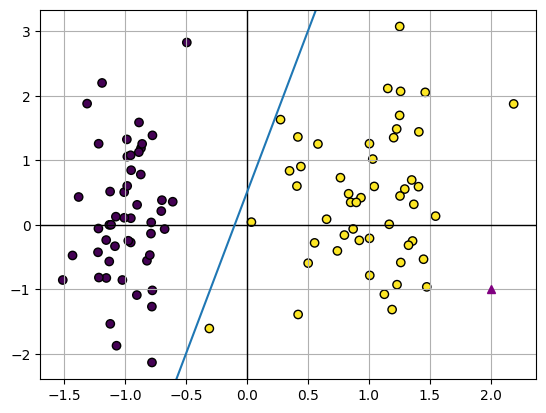

In [ ]:
plotmodel(w1, w2, b)
plt.plot(p[0], p[1], marker = '^', color = cor)

Por alguma raz√£o o classificador errou, preciso entender o motivo.

###Implementando uma rede neural com PyTorch:

**Criando um conjunto de dados que servir√° de estudo √† rede neural:**

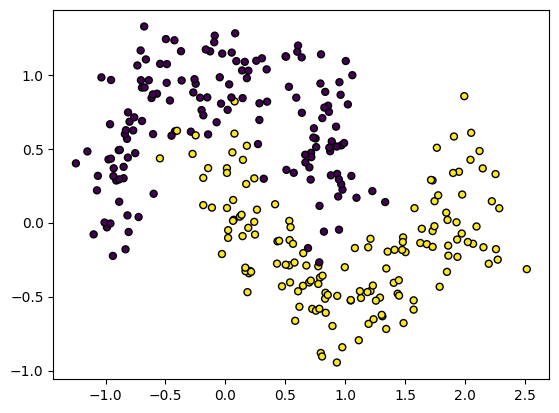

In [ ]:
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X1, Y1 = make_moons(n_samples = 300, noise = 0.2)
plt.scatter(X1[:, 0], X1[:, 1], marker = 'o',
            c = Y1, s = 25, edgecolor = 'k')

In [ ]:
import torch
from torch import nn # nn = neural networks

# Instanciando um neur√¥nio:

# Passo como par√¢metro a quantidade de dados de entrada, que ser√£o
# as vari√°veis explicativas do modelo, passando em sequ√™ncia o par√¢metro
# que se refere √†(s) vari√°vel(is) resposta(s). O bias por padr√£o j√° √© colocado
# como True no modelo.

perceptron = nn.Linear(3, 1)
perceptron

Linear(in_features=3, out_features=1, bias=True)

In [ ]:
# Caso eu queira ver os coeficientes do modelo:

for nome, tensor in perceptron.named_parameters():

  print(nome, tensor.data)

weight tensor([[-0.0310, -0.4136,  0.2506]])
bias tensor([0.3694])


###Camadas de neur√¥nios:

Um neur√¥nio n√£o √© capaz de realizar fun√ß√µes matem√°ticas n√£o lineares, de modo que n√£o se faz apto para solucionar problemas mais complexos que n√£o s√£o pass√≠veis de solu√ß√£o via forma linear. Por√©m, h√° um modo com o qual pode-se solucionar tais quest√µes, bastando apenas criar uma camada de "neur√¥nios stealths" que podem cada qual produzir um como sa√≠da uma fun√ß√£o n√£o linear, produzindo um todo que permita ao neur√¥nio a realiza√ß√£o de tais tarefas.

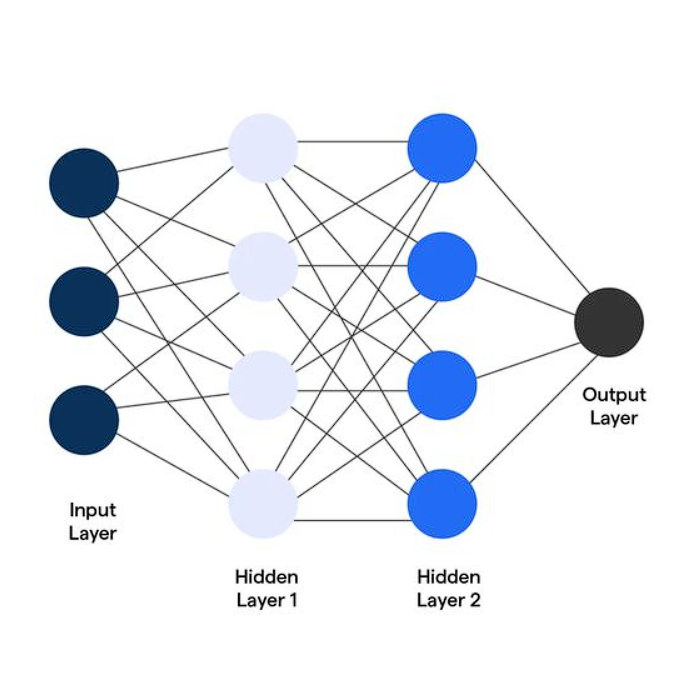

Como pode ser visto na figura acima, cria-se uma camada (ainda que aqui sejam duas) de neur√¥nios stealths, os quais s√£o respons√°veis por gerar uma sa√≠da n√£o linear, as que s√£o enviadas ao Perceptron, que retorna uma resposta. Para cen√°rios bin√°rios, os quais a sa√≠da pode ser compreendida em Sim ou N√£o, adota-se um √∫nico Perceptron.

Mas como criar isso em termos de c√≥digo ?

Em termos de c√≥digo a cria√ß√£o de uma rede neural obedece a seguinte estrutura: Um container que ir√° abrigar a cria√ß√£o dos neur√¥nios que receber√£o a entrada, depois a fun√ß√£o de sa√≠da, depois o Perceptron e, por fim, a fun√ß√£o de sa√≠da desse. Esquematicamente:

- Containter (sequential);
- Neur√¥nios stealths;
- Fun√ß√£o de ativa√ß√£o (tem que ser n√£o linear);
- Neur√¥nio;
- Fun√ß√£o de ativa√ß√£o do neur√¥nio anterior.

In [ ]:
import torch
from torch import nn # nn = neural networks

# Vari√°veis de entrada √† rede.
input_size = 2

# Aqui h√° a por√ß√£o escondida da rede neural. Trata-se de um hiperpar√¢metro
# respons√°vel por criar neur√¥nios escondidos, de modo a fazer o modelo aprender
# cen√°rios complexos. Ele perpassa o escopo da otimiza√ß√£o, uma vez que demanda
# capacidade de processamento / precis√£o do modelo, na medida que nessa busca-se
# o ponto de √≥timo da melhor precis√£o poss√≠vel com a menor exig√™ncia do equipamento.
# No caso presente, por√©m, arbitrariamente, estou passando 8 neur√¥nios escondidos.
hidden_size = 8

# Sa√≠da do neur√¥nio.
output_size = 1

network = nn.Sequential(nn.Linear(in_features=input_size, out_features=hidden_size),  # neur√¥nio stealth
                        nn.ReLU(),     # instanciando ReLU como uma camada
                        nn.Linear(in_features=hidden_size, out_features=output_size)) # √∫ltimo neur√¥nio, a sa√≠da.


In [ ]:
# Visualizando as informa√ß√µes sobre a nossa rede, como quantidade de par√¢metros
# e o tamanho que cada elemento ocupa na mem√≥ria.

from torchsummary import summary

summary(network, input_size = (1, input_size))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                 [-1, 1, 8]              24
              ReLU-2                 [-1, 1, 8]               0
            Linear-3                 [-1, 1, 1]               9
Total params: 33
Trainable params: 33
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.00
Estimated Total Size (MB): 0.00
----------------------------------------------------------------


**Forward:**

Fazendo os dados passarem aos dados.

In [ ]:
tensor.size()

torch.Size([300, 2])

In [ ]:
# Transformando um array numpy em um tensor, para
# que possa ser lido pela rede neural. N√£o obstante,
# devo transformar o array em seu tipo float32, pois
# √© o modo com o qual as redes l√™em, de modo que n√£o
# leriam o array em sua forma float64.
tensor = torch.from_numpy(X1).float()

# Armazenando os dados gerados ao passar o tensor pela rede.
pred = network(tensor)

print(pred.size())

torch.Size([300, 1])


Note que o tamanho do tensor mudou ao o que ele era antes de passar pela rede neural. Isso ocorre, pois por se tratar de um problema bin√°rio e na presen√ßa de apenas um perceptron de sa√≠da, a sa√≠da possui apenas uma dimens√£o, "uma coisa ou outra".

###Classe nn.Module

A forma mais organizada de definir modelos em PyTorch √© implementando uma classe nos moldes da classe nn.Module. A sua real import√¢ncia √© vista para a constru√ß√£o de redes complexas e maiores, que ficam mais f√°ceis de serem implementadas e realizar manuten√ß√£o desse modo.

As fun√ß√µes obrigat√≥rias do nn.Module s√£o:

- __ init__() : defini√ß√£o de hiperpar√¢metros e instancia o modelo;
- forward() : Fluxo de entrada para produzir uma sa√≠da.  

In [ ]:
class Network(nn.Module):

  # Define uma arquitetura.

  def __init__(self, input_size, hidden_size, output_size):

    super(Network, self).__init__()

    self.hidden = nn.Linear(input_size, hidden_size)
    self.relu = nn.ReLU()
    self.output = nn.Linear(hidden_size, output_size)

  # Gera uma sa√≠da a partir dos dados de entrada.

  def forward(self, X):

    # A sa√≠da aqui √© de dentro para fora, quero dizer:
    # produz-se um resultado primeiro no self.hidden(X),
    # o qual √© passado para relu, que posteriormente ir√°
    # produzir outro valor, o qual ser√° armazenado na
    # vari√°vel hidden.
    hidden = self.relu(self.hidden(X))

    # Armazena o valor encontrado com o hidden.
    output = self.output(hidden)

    return output



**Instanciando a rede:**

In [ ]:
# Vari√°veis de entrada √† rede.
input_size = 2

# Aqui h√° a por√ß√£o escondida da rede neural. Trata-se de um hiperpar√¢metro
# respons√°vel por criar neur√¥nios escondidos, de modo a fazer o modelo aprender
# cen√°rios complexos. Ele perpassa o escopo da otimiza√ß√£o, uma vez que demanda
# capacidade de processamento / precis√£o do modelo, na medida que nessa busca-se
# o ponto de √≥timo da melhor precis√£o poss√≠vel com a menor exig√™ncia do equipamento.
# No caso presente, por√©m, arbitrariamente, estou passando 8 neur√¥nios escondidos.
hidden_size = 8

# Sa√≠da do neur√¥nio.
output_size = 1


net = Network(input_size, hidden_size, output_size)

**Forward:**

In [ ]:
# Transformando um array numpy em um tensor, para
# que possa ser lido pela rede neural. N√£o obstante,
# devo transformar o array em seu tipo float32, pois
# √© o modo com o qual as redes l√™em, de modo que n√£o
# leriam o array em sua forma float64.
tensor = torch.from_numpy(X1).float()

# Armazenando os dados gerados ao passar o tensor pela rede.
pred = net(tensor)

print(pred.size())

torch.Size([300, 1])
